# End-to-End Python POC: SGS.ai Self-Generation Loop with HLLSet Swarm

Below is a complete Python proof-of-concept implementation of the SGS.ai self-generation loop with HLLSet swarm management. This implementation includes:

1. Basic HLLSet simulation (using Python sets for clarity, but extendable to probabilistic HLLSets)

2. HRT AM construction from token sequences

3. Canonical cover optimization for active HLLSets

4. Particle Swarm Management (PSM) with Noether conservation

5. Full self-generation loop with forecasting capabilities

In [1]:
from workthrough import *

In [2]:
# ============================================================================
# 6. DEMONSTRATION & TESTING
# ============================================================================

def generate_sample_data(vocab_size: int = 100, n_sequences: int = 50) -> List[List[str]]:
    """Generate sample token sequences for testing"""
    sequences = []
    
    # Create some patterns
    patterns = [
        [f"chr_{i}" for i in range(0, 10)],
        [f"chr_{i}" for i in range(5, 15)],
        [f"chr_{i}" for i in range(10, 20)],
        [f"chr_{i}" for i in range(15, 25)],
    ]
    
    for _ in range(n_sequences):
        # Choose random pattern and add noise
        pattern = random.choice(patterns)
        sequence = pattern.copy()
        
        # Add some random tokens
        if random.random() > 0.7:
            sequence.append(f"chr_{random.randint(0, vocab_size-1)}")
        
        sequences.append(sequence)
    
    return sequences



## Run main

Initializing SGS.ai Self-Generation Loop POC...

1. Initializing Token Layer...
   HRT AM built with 100 tokens

2. Building HLLSet Cortex...
Built 66 basic HLLSets
   Active HLLSets: 30
   Cortex tokens: 35

3. Initializing Particle Swarm Manager...
   Particles in swarm: 30

4. Starting Self-Generation Loop...

Self-Generation Loop Iteration 1
2. Forecasting...
3. Finding canonical cover...
   Cover size: 16, Coverage: 1.000
4. Steering swarm with PSM...
   Noether conservation error: 36
5. Updating cortex...
6. Validating...
   Iteration 1: Cortex=41, Swarm=34, Noether err=36

Self-Generation Loop Iteration 2
2. Forecasting...
3. Finding canonical cover...
   Cover size: 19, Coverage: 1.000
4. Steering swarm with PSM...
   Noether conservation error: 19
5. Updating cortex...
6. Validating...
   Iteration 2: Cortex=41, Swarm=34, Noether err=19

Self-Generation Loop Iteration 3
2. Forecasting...
3. Finding canonical cover...
   Cover size: 19, Coverage: 1.000
4. Steering swarm with PS

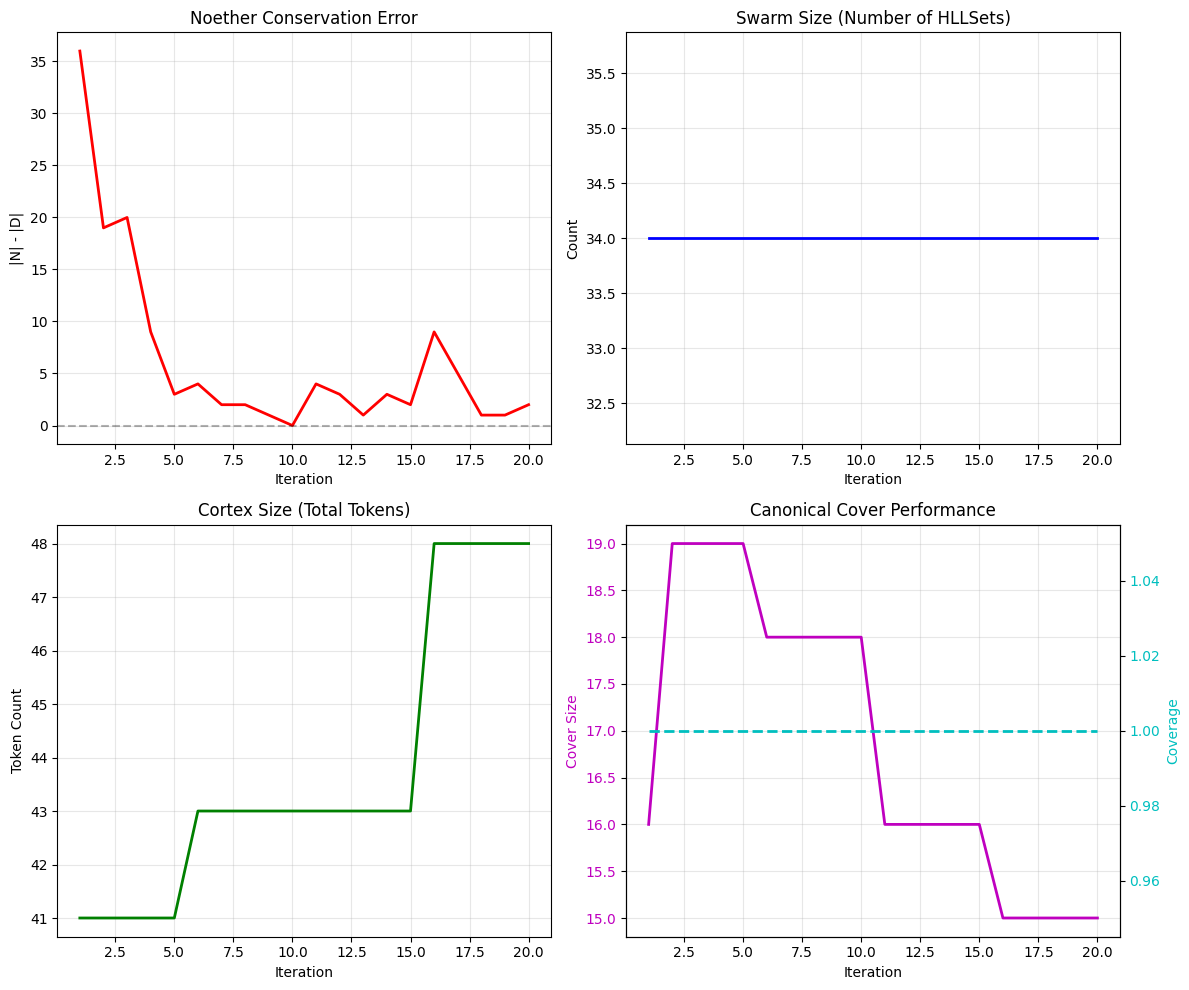


Demonstrating Control Knobs:
  Switching to historical analysis mode...
  Adjusting swarm density to 0.5...
  Setting forecast horizon to 3...

Running final iteration with new settings...

Self-Generation Loop Iteration 21
2. Forecasting...
3. Finding canonical cover...
   Cover size: 15, Coverage: 1.000
4. Steering swarm with PSM...
   Noether conservation error: 0
5. Updating cortex...
6. Validating...

POC completed successfully!


In [3]:
def main():
    """Main demonstration of the self-generation loop"""
    print("Initializing SGS.ai Self-Generation Loop POC...")
    
    # 1. Initialize token layer
    print("\n1. Initializing Token Layer...")
    token_layer = TokenLayer(base_vocab_size=100)
    
    # Generate and ingest sample data
    sample_data = generate_sample_data(vocab_size=100, n_sequences=100)
    token_layer.update_hrt_am(sample_data)
    print(f"   HRT AM built with {token_layer.vocab_size} tokens")
    
    # 2. Initialize cortex and build basic HLLSets
    print("\n2. Building HLLSet Cortex...")
    cortex = HLLSetCortex(token_layer)
    cortex.build_basic_hllsets(freq_threshold=0.1)
    cortex.initialize_active_hllsets(n_active=30)
    print(f"   Active HLLSets: {len(cortex.active_hllsets)}")
    print(f"   Cortex tokens: {len(cortex.cortex_tokens)}")
    
    # 3. Initialize Particle Swarm Manager
    print("\n3. Initializing Particle Swarm Manager...")
    psm = ParticleSwarmManager(cortex, w=0.5, c1=1.0, c2=1.0, c3=0.5)
    psm.initialize_particles()
    print(f"   Particles in swarm: {len(psm.particles)}")
    
    # 4. Initialize and run self-generation loop
    print("\n4. Starting Self-Generation Loop...")
    sgs_loop = SGSaiSelfGenerationLoop(token_layer, cortex, psm, horizon=2)
    
    # Set control knobs
    sgs_loop.set_control_knob('density', 0.3)
    sgs_loop.set_control_knob('mode', True)  # Forecasting mode
    sgs_loop.set_control_knob('horizon', 2)
    
    # Run multiple iterations
    n_iterations = 20
    for i in range(n_iterations):
        # Generate some new data for some iterations
        new_data = None
        if i % 5 == 0 and i > 0:
            new_data = generate_sample_data(vocab_size=100, n_sequences=20)
        
        # Run iteration
        stats = sgs_loop.run_iteration(new_data)
        
        # Print summary
        print(f"   Iteration {i+1}: Cortex={stats['cortex_size']}, "
              f"Swarm={stats['swarm_size']}, "
              f"Noether err={stats['noether_error']}")
    
    # 5. Display results
    print("\n" + "="*60)
    print("SELF-GENERATION LOOP COMPLETE")
    print("="*60)
    
    print(f"\nFinal State:")
    print(f"  - Active HLLSets: {len(cortex.active_hllsets)}")
    print(f"  - Cortex tokens: {len(cortex.cortex_tokens)}")
    print(f"  - Swarm particles: {len(psm.particles)}")
    print(f"  - Noether violations: {sum(1 for e in psm.noether_violations if e > 5)}")
    
    # Show canonical cover performance
    cover_size, coverage = cortex.get_optimal_cover_size()
    print(f"\nCanonical Cover Performance:")
    print(f"  - Cover size: {cover_size}")
    print(f"  - Coverage: {coverage:.3f}")
    
    # Plot statistics
    print("\nGenerating statistics plots...")
    sgs_loop.plot_statistics()
    
    # Demonstrate control knobs
    print("\nDemonstrating Control Knobs:")
    print("  Switching to historical analysis mode...")
    sgs_loop.set_control_knob('mode', False)
    
    print("  Adjusting swarm density to 0.5...")
    sgs_loop.set_control_knob('density', 0.5)
    
    print("  Setting forecast horizon to 3...")
    sgs_loop.set_control_knob('horizon', 3)
    
    # Run one more iteration with new settings
    print("\nRunning final iteration with new settings...")
    final_stats = sgs_loop.run_iteration()
    
    return {
        'token_layer': token_layer,
        'cortex': cortex,
        'psm': psm,
        'loop': sgs_loop,
        'final_stats': final_stats
    }

if __name__ == "__main__":
    results = main()
    print("\nPOC completed successfully!")